In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [3]:
df = pd.read_csv('dataset_full.csv')

In [38]:
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [39]:
df.shape

(88647, 112)

In [40]:
df.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

In [4]:
y = df['phishing']
y

0        1
1        1
2        0
3        1
4        0
        ..
88642    0
88643    0
88644    1
88645    1
88646    0
Name: phishing, Length: 88647, dtype: int64

In [5]:
X = df.drop('phishing', axis = 1)
X.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened'],
      dtype='object', length=111)

In [43]:
(X.shape, y.shape)

((88647, 111), (88647,))

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
RFC = RandomForestClassifier(n_estimators=350, random_state=42)

In [48]:
RFC.fit(X_train, y_train)

RandomForestClassifier(n_estimators=350, random_state=42)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from imblearn.metrics import specificity_score, sensitivity_score

def cal_metrics(model, X_test, y_test):
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, pred)
    print('model accuracy: {0:4f}'.format(accuracy))
    
    sensitivity = sensitivity_score(y_test, pred, average='binary')
    print('model sensitivity: {0:4f}'.format(sensitivity))
    
    specificity = specificity_score(y_test, pred, average='binary')
    print('model specificity: {0:4f}'.format(specificity))
    
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    print('roc_auc_score: {0:4f}'.format(auc_score))
    
    oconfusion_matrix = confusion_matrix(y_test, pred)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    print('classification report: \n {}'.format(classification_report(y_test, pred)))
    
    fp, tp, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1], pos_label=1)
    random_probs = [0 for i in range(len(y_test))]
    f, t, _ = roc_curve(y_test, random_probs, pos_label=1)
    
    plt.plot(fp, tp, linestyle = '-', color = 'green', label = model)
    plt.plot(f, t, linestyle = '-', color = 'blue', label = 'Random Classifier')
    
    plt.title('ROC Curve')
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    plt.legend()
    
    plt.show()

model accuracy: 0.969280
model sensitivity: 0.961404
model specificity: 0.973408
roc_auc_score: 0.994854
Confusion matrix: 
 [[16985   464]
 [  353  8793]]
classification report: 
               precision    recall  f1-score   support

           0       0.98      0.97      0.98     17449
           1       0.95      0.96      0.96      9146

    accuracy                           0.97     26595
   macro avg       0.96      0.97      0.97     26595
weighted avg       0.97      0.97      0.97     26595



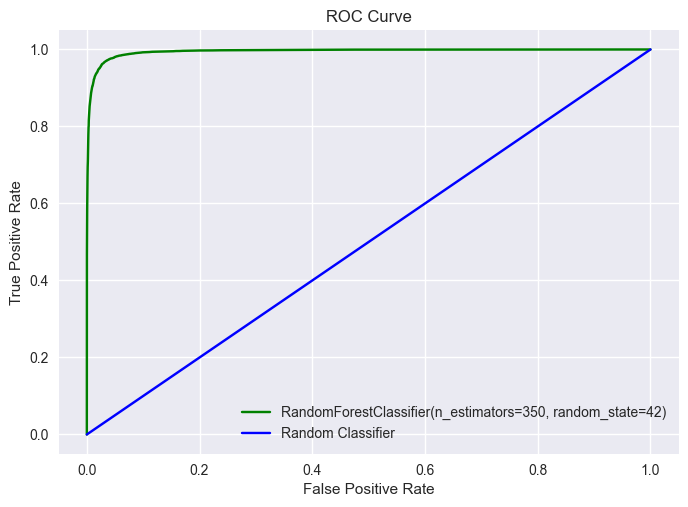

In [57]:
cal_metrics(RFC, X_test, y_test)

In [58]:
from sklearn.linear_model import LogisticRegression

In [59]:
LR = LogisticRegression()

In [60]:
LR.fit(X_train, y_train)

C:\Users\Abhilash Ku Behera\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

model accuracy: 0.879113
model sensitivity: 0.750164
model specificity: 0.946702
roc_auc_score: 0.948065
Confusion matrix: 
 [[16519   930]
 [ 2285  6861]]
classification report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     17449
           1       0.88      0.75      0.81      9146

    accuracy                           0.88     26595
   macro avg       0.88      0.85      0.86     26595
weighted avg       0.88      0.88      0.88     26595



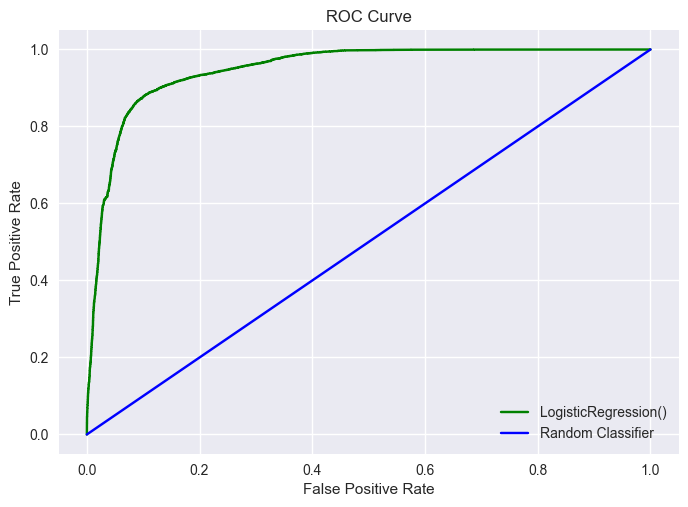

In [61]:
cal_metrics(LR, X_test, y_test)

In [62]:
from sklearn import tree

In [63]:
DT = tree.DecisionTreeClassifier()

In [64]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

model accuracy: 0.952923
model sensitivity: 0.932429
model specificity: 0.963666
roc_auc_score: 0.948042
Confusion matrix: 
 [[16815   634]
 [  618  8528]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.96      0.96     17449
           1       0.93      0.93      0.93      9146

    accuracy                           0.95     26595
   macro avg       0.95      0.95      0.95     26595
weighted avg       0.95      0.95      0.95     26595



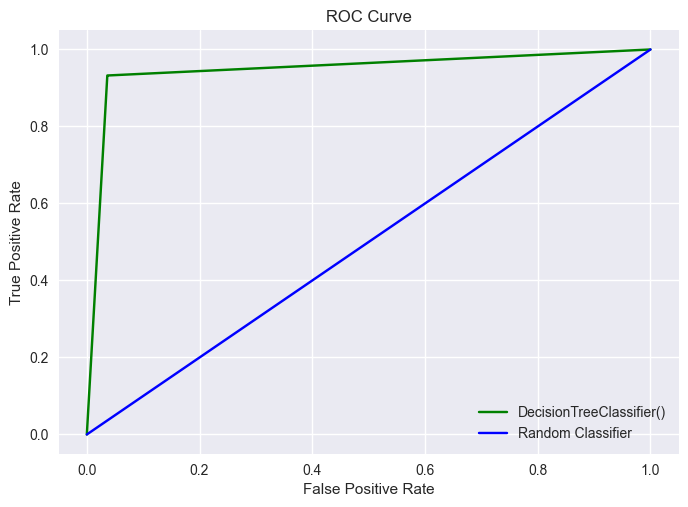

In [65]:
cal_metrics(DT, X_test, y_test)

In [27]:
cal_metrics(svm, X_test, y_test)

model accuracy: 0.756345
model sensitivity: 0.566805
model specificity: 0.855694
Confusion matrix: 
 [[14931  2518]
 [ 3962  5184]]
classification report: 
               precision    recall  f1-score   support

           0       0.79      0.86      0.82     17449
           1       0.67      0.57      0.62      9146

    accuracy                           0.76     26595
   macro avg       0.73      0.71      0.72     26595
weighted avg       0.75      0.76      0.75     26595



In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [67]:
KNN = KNeighborsClassifier(n_neighbors=283)

In [68]:
KNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=283)

model accuracy: 0.804437
model sensitivity: 0.675924
model specificity: 0.871798
roc_auc_score: 0.874189
Confusion matrix: 
 [[15212  2237]
 [ 2964  6182]]
classification report: 
               precision    recall  f1-score   support

           0       0.84      0.87      0.85     17449
           1       0.73      0.68      0.70      9146

    accuracy                           0.80     26595
   macro avg       0.79      0.77      0.78     26595
weighted avg       0.80      0.80      0.80     26595



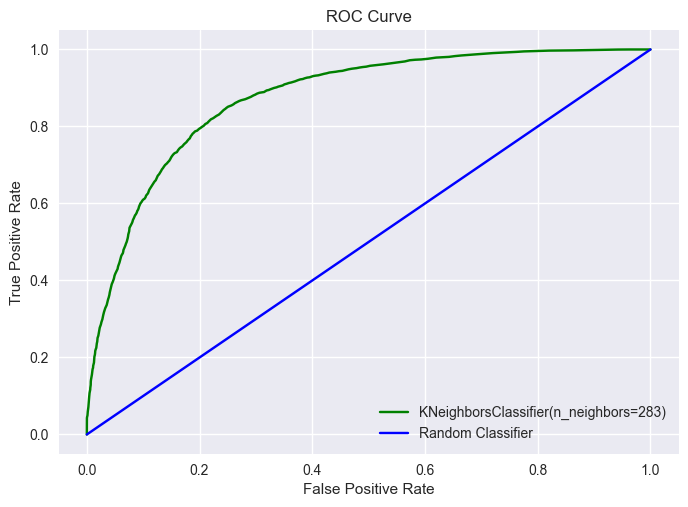

In [69]:
cal_metrics(KNN, X_test, y_test)

In [70]:
from sklearn.naive_bayes import GaussianNB

In [71]:
GNB = GaussianNB()

In [72]:
GNB.fit(X_train, y_train)

GaussianNB()

model accuracy: 0.841624
model sensitivity: 0.623989
model specificity: 0.955699
roc_auc_score: 0.955577
Confusion matrix: 
 [[16676   773]
 [ 3439  5707]]
classification report: 
               precision    recall  f1-score   support

           0       0.83      0.96      0.89     17449
           1       0.88      0.62      0.73      9146

    accuracy                           0.84     26595
   macro avg       0.85      0.79      0.81     26595
weighted avg       0.85      0.84      0.83     26595



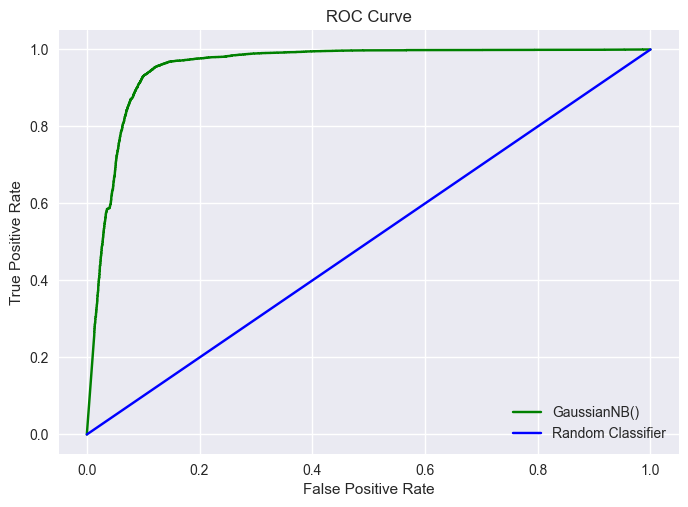

In [73]:
cal_metrics(GNB, X_test, y_test)

In [10]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [11]:
sc = StandardScaler()

In [12]:
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.fit_transform(X_test)

In [13]:
svm_linear = SVC(kernel='linear', random_state=42, cache_size=100)

In [14]:
svm_linear.fit(X_train_std, y_train)

SVC(cache_size=100, kernel='linear', random_state=42)

In [15]:
def cal_metrics_svm(model, X_test, y_test):
    pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, pred)
    print('model accuracy: {0:4f}'.format(accuracy))
    
    sensitivity = sensitivity_score(y_test, pred, average='binary')
    print('model sensitivity: {0:4f}'.format(sensitivity))
    
    specificity = specificity_score(y_test, pred, average='binary')
    print('model specificity: {0:4f}'.format(specificity))
    
    oconfusion_matrix = confusion_matrix(y_test, pred)
    print('Confusion matrix: \n {}'.format(oconfusion_matrix))
    print('classification report: \n {}'.format(classification_report(y_test, pred)))

In [16]:
cal_metrics_svm(svm_linear, X_test_std, y_test)

model accuracy: 0.931566
model sensitivity: 0.918434
model specificity: 0.938449
Confusion matrix: 
 [[16375  1074]
 [  746  8400]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.94      0.95     17449
           1       0.89      0.92      0.90      9146

    accuracy                           0.93     26595
   macro avg       0.92      0.93      0.92     26595
weighted avg       0.93      0.93      0.93     26595



In [17]:
svm_poly = SVC(kernel='poly', random_state=42, cache_size=100)

In [18]:
svm_poly.fit(X_train_std, y_train)

SVC(cache_size=100, kernel='poly', random_state=42)

In [19]:
cal_metrics_svm(svm_poly, X_test_std, y_test)

model accuracy: 0.942132
model sensitivity: 0.926307
model specificity: 0.950427
Confusion matrix: 
 [[16584   865]
 [  674  8472]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     17449
           1       0.91      0.93      0.92      9146

    accuracy                           0.94     26595
   macro avg       0.93      0.94      0.94     26595
weighted avg       0.94      0.94      0.94     26595



In [20]:
svm_rbf = SVC(kernel='rbf', random_state=42, cache_size=100)

In [21]:
svm_rbf.fit(X_train_std, y_train)

SVC(cache_size=100, random_state=42)

In [22]:
cal_metrics_svm(svm_rbf, X_test_std, y_test)

model accuracy: 0.942696
model sensitivity: 0.924995
model specificity: 0.951974
Confusion matrix: 
 [[16611   838]
 [  686  8460]]
classification report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.96     17449
           1       0.91      0.92      0.92      9146

    accuracy                           0.94     26595
   macro avg       0.94      0.94      0.94     26595
weighted avg       0.94      0.94      0.94     26595

